# Introduction
Julian

# Preprocessing
Lloyd
Dataset and preprocessing

The main dataset is constructed from three separate databases. The first database contains information about suicides in each country, as for men and women. It goes into the specifics about how many suicides per 100.000 people happen, which age they were and what percentage were women and what percentage were men. This gives a clear view on the ratio of suicides between these genders per country. There are 62 countries registered in this dataset.
 This dataset contains information about the Human Development Index (HDI) and the Gender Development Index (GDI) by country, in 2015. The HDI measures human development by looking at health, education, and standard of living. The GDI looks at the gender inequalities in these human developments. The dataset also contains information about the life expectancy of the two genders in each country and the Gross National Income. There are 195 countries registered in this dataset.


# 4 nearly finished visualizations

Mitch & Julian

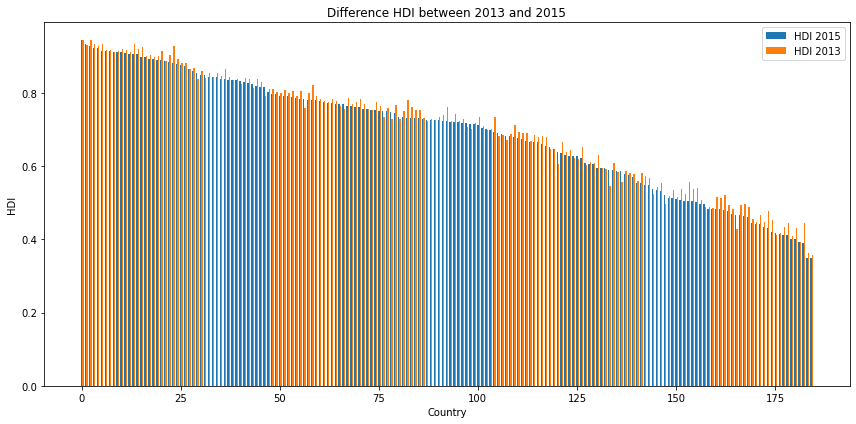

In [9]:
# Visualisatie 1:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('databases/hdi_year_comparison.csv')

# Create a new DataFrame with the required columns
df = data[['Country', 'HDI 2015', 'HDI 2013']]

# Select the first 10 countries
#df = df.head(15)

# Select every 10th country
#df = df.iloc[::8]

# Set the position of the bars on the x-axis
x = np.arange(len(df['Country']))

# Set the width of the bars
bar_width = 0.35

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(x, df['HDI 2015'], width=bar_width, label='HDI 2015')
plt.bar(x + bar_width, df['HDI 2013'], width=bar_width, label='HDI 2013')
plt.xlabel('Country')
plt.ylabel('HDI')
plt.title('Difference HDI between 2013 and 2015')
plt.legend()
#plt.xticks(x + bar_width/2, df['Country'], rotation=90)
plt.tight_layout()
plt.show()


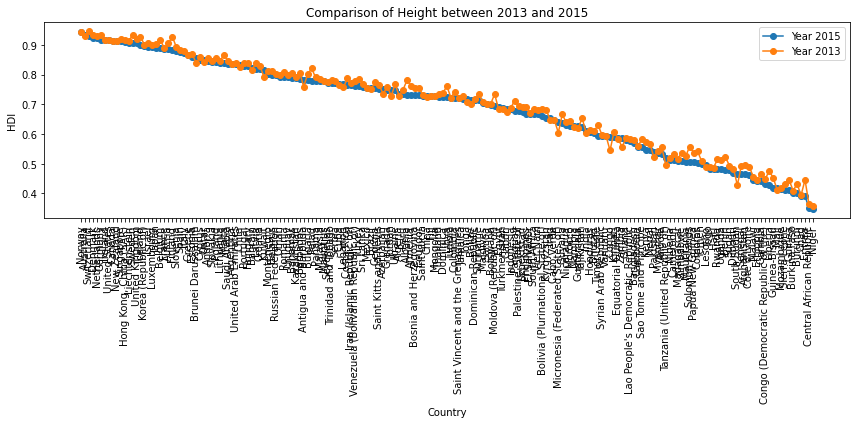

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('databases/hdi_year_comparison.csv')

# Create a new DataFrame with the required columns
df = data[['Country', 'HDI 2015', 'HDI 2013']]

# Convert columns to NumPy arrays
countries = df['Country'].values
height_2015 = df['HDI 2015'].values
height_2013 = df['HDI 2013'].values

# Plot the data
plt.figure(figsize=(12, 6))

# Plot lines for each year
plt.plot(countries, height_2015, marker='o', label='Year 2015')
plt.plot(countries, height_2013, marker='o', label='Year 2013')

plt.xlabel('Country')
plt.ylabel('HDI')
plt.title('Comparison of Height between 2013 and 2015')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

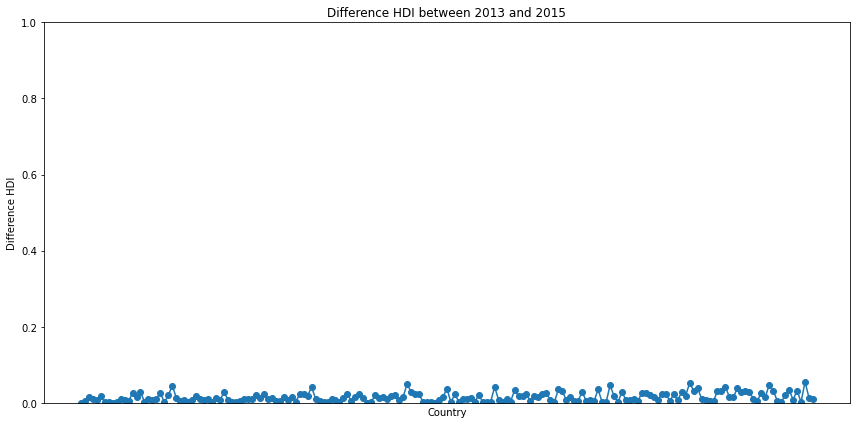

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('databases/hdi_year_comparison.csv')

# Create a new DataFrame with the required columns
df = data[['Country', 'HDI 2015', 'HDI 2013']]

# Calculate the absolute difference between the two values
df['Difference'] = np.abs(df['HDI 2015'] - df['HDI 2013'])

# Convert columns to NumPy arrays
height_diff = df['Difference'].values

# Plot the data
plt.figure(figsize=(12, 6))

# Plot a line for the difference
plt.plot(height_diff, marker='o')

plt.xlabel('Country')
plt.ylabel('Difference HDI')
plt.title('Difference HDI between 2013 and 2015')
plt.xticks([])
plt.ylim(0.00, 1)
plt.tight_layout()
plt.show()


# Description for each of your arguments
Mitch & Lloyd